# 14 차시 - 연습문제 해설

FinanceDataReader를 사용하여 코스피지수(KS11), 삼성전자(005930), 현대차(005380), SK텔레콤(017670)
4개 종목(지수포함)에 대해 2020년 1분기 (2020-01-01 ~ 2020-03-31) 동안의 데이터를 가져옵니다.

1. 4개 종목의 종가(Close) 하나의 DataFrame으로 합칩니다.  (각 컬럼의 이름은 KS11, SEC, HMC, SKT 합니다)
2. 4개종목을 하나의 차트로 그립니다(지수는 오른쪽 Y축을 기준으로 합니다)
3. 종목간의 산점도(scatter)를 그립니다

In [1]:
import seaborn as sns
import FinanceDataReader as fdr
import pandas as pd

In [2]:
start, end = '2020-01-01', '2020-03-31'

ks11 = fdr.DataReader('KS11', start, end)
sec = fdr.DataReader('005930', start, end)
hmc = fdr.DataReader('005380', start, end)
skt = fdr.DataReader('017670', start, end)

In [3]:
ks11

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,4.946800e+08,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,6.315600e+08,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,5.926700e+08,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,5.682400e+08,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,9.138300e+08,-0.0111
...,...,...,...,...,...,...
2020-03-25,1704.76,1668.19,1707.64,1645.28,8.728100e+08,0.0589
2020-03-26,1686.24,1699.11,1735.75,1679.23,9.924700e+08,-0.0109
2020-03-27,1717.73,1756.07,1759.05,1668.21,1.080000e+09,0.0187


In [4]:
price = pd.DataFrame()
price['KS11'] = ks11['Close']
price['SEC'] = sec['Close']
price['HMC'] = hmc['Close']
price['SKT'] = skt['Close']

In [5]:
price

,KS11,SEC,HMC,SKT
Date,,,,
2020-01-02,2175.17,55200,118000,234000
2020-01-03,2176.46,55500,116000,234000
2020-01-06,2155.07,55500,116000,231500
2020-01-07,2175.54,55800,115500,233000
2020-01-08,2151.31,56800,112000,232500
...,...,...,...,...
2020-03-25,1704.76,48650,84500,174500
2020-03-26,1686.24,47800,84900,173000
2020-03-27,1717.73,48300,86400,176500


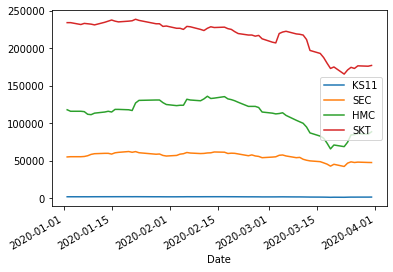

In [6]:
price.plot()

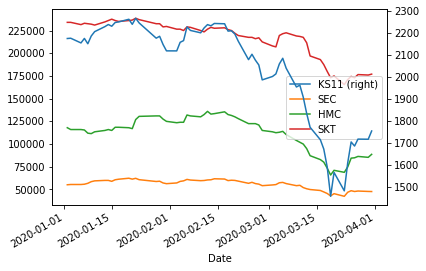

In [7]:
price.plot(secondary_y='KS11')

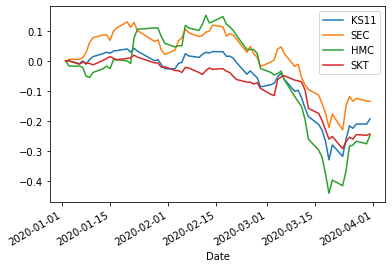

In [8]:
df_plot = price / price.iloc[0] - 1.0
df_plot.plot()

## 일일 수익률

In [9]:
changes = pd.DataFrame()
changes['KS11'] = ks11['Change']
changes['SEC'] = sec['Change']
changes['HMC'] = hmc['Change']
changes['SKT'] = skt['Change']

In [10]:
changes

,KS11,SEC,HMC,SKT
Date,,,,
2020-01-02,-0.0102,-0.010753,-0.020747,-0.016807
2020-01-03,0.0006,0.005435,-0.016949,0.000000
2020-01-06,-0.0098,0.000000,0.000000,-0.010684
2020-01-07,0.0095,0.005405,-0.004310,0.006479
2020-01-08,-0.0111,0.017921,-0.030303,-0.002146
...,...,...,...,...
2020-03-25,0.0589,0.036209,0.129679,0.020468
2020-03-26,-0.0109,-0.017472,0.004734,-0.008596
2020-03-27,0.0187,0.010460,0.017668,0.020231


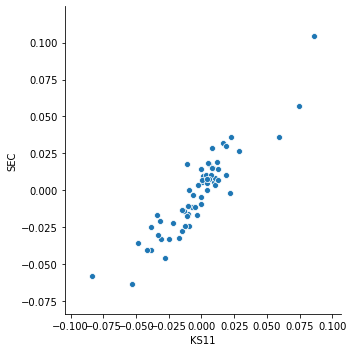

In [11]:
sns.relplot(x='KS11', y='SEC', data=changes)

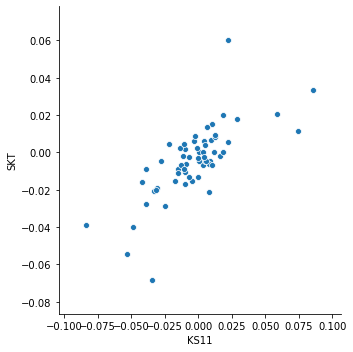

In [12]:
sns.relplot(x='KS11', y='SKT', data=changes)

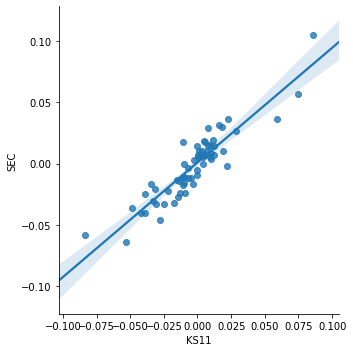

In [13]:
sns.lmplot(x='KS11', y='SEC', data=changes)